# Shapelets and the Shapelet Transform with `sktime`

From: https://www.sktime.org/en/latest/examples/shapelet_transform.html

## Overview

Introduced in \[1\], a shapelet is:
> a time series subsequence that is identified as being representative of class membership. 

Shapelets are a powerful approach for measuring phase-independent similarity between time series; they can occur at any point within a series and offer interpretable results for how matches occur. 

The original research extracted shapelets to build a decision tree classifier.

<br/>

The example below illustrates how leaf shape can be represented as a one-dimensional time series (blue line) to distinguish between two species. \[2\]

<img src="https://www.sktime.org/en/latest/_images/leaf_types.png" width=500/>
<img src="https://www.sktime.org/en/latest/_images/verdena_shapelet.png" width=350/>

The highlighted red subsection of the time series (i.e., “subsequences”) above is the shapelet that distinguishes *Verbena urticifolia* from *Urtica dioica*.

## The Shapelet Transform

Much research emphasis has been placed on shapelet-based approaches for time series classification (TSC) since the original research was proposed. The current state-of-the-art for shapelets is the shapelet transform (ST) \[3, 4\].

The transform improves upon the original use of shapelets by separating shapelet extraction from the classification algorithm, allowing interpretable phase-independent classification of time series with any standard classification algorithm (such as random/rotation forest, neural networks, nearest neighbour classifications, ensembles of all, etc.). 

To facilitate this, rather than recursively assessing data for the best shapelet, the transform evaluates candidate shapelets in a single procedure to rank them based on information gain. Then, given a set of k shapelets, a time series can be transformed into k features by calculating the distance from the series to each shapelet. By transforming a dataset in this manner any vector-based classification algorithm can be applied to a shapelet-transformed time series problem while the interpretability of shapelets is maintained through the ranked list of the best shapelets during transformation.

<br/>

Shapelets can provide interpretable results, as seen in the figure below:

<img src="https://www.sktime.org/en/latest/_images/leaves_shapelets.png" width=550/>

The shapelet has “discovered” where the two plant species distinctly differ. *Urtica dioica* has a stem that connects to the leaf at almost 90 degrees, whereas the stem of *Verbena urticifolia* connects to the leaf at a wider angle.

<br/>

Having found shapelet, its distance to the nearest matching subsequence in all objects in the database can be recorded. Finally, a simple decision tree classifier can be built to determine whether an object $Q$ has a subsequence within a certain distance from shapelet $I$.

<img src="https://www.sktime.org/en/latest/_images/shapelet_classifier.png" width=500/>

## References

[1] Ye, Lexiang, and Eamonn Keogh. “Time series shapelets: a novel technique that allows accurate, interpretable and fast classification.” Data mining and knowledge discovery 22, no. 1-2 (2011): 149-182.

[2] Ye, Lexiang, and Eamonn Keogh. “Time series shapelets: a new primitive for data mining.” In Proceedings of the 15th ACM SIGKDD international conference on Knowledge discovery and data mining, pp. 947-956. 2009.

[3] Lines, Jason, Luke M. Davis, Jon Hills, and Anthony Bagnall. “A shapelet transform for time series classification.” In Proceedings of the 18th ACM SIGKDD international conference on Knowledge discovery and data mining, pp. 289-297. ACM, 2012.

[4] Hills, Jon, Jason Lines, Edgaras Baranauskas, James Mapp, and Anthony Bagnall. “Classification of time series by shapelet transformation.” Data Mining and Knowledge Discovery 28, no. 4 (2014): 851-881.

[5] Bostrom, Aaron, and Anthony Bagnall. “Binary shapelet transform for multiclass time series classification.” In Transactions on Large-Scale Data-and Knowledge-Centered Systems XXXII, pp. 24-46. Springer, Berlin, Heidelberg, 2017.


## Example: The Shapelet Transform in `sktime`

The following workbook demonstrates a full workflow of using the shapelet transform in sktime with a `scikit-`learn classifier with the [OSU Leaf](http://www.timeseriesclassification.com/description.php?Dataset=OSULeaf) dataset, which consists of one dimensional outlines of six leaf classes: *Acer Circinatum, Acer Glabrum, Acer Macrophyllum, Acer Negundo, Quercus Garryana and Quercus Kelloggii*.

In [1]:
from sktime.datasets import load_osuleaf
from sktime.transformations.panel.shapelets import ContractedShapeletTransform

In [2]:
train_x, train_y = load_osuleaf(split="train", return_X_y=True)
test_x, test_y = load_osuleaf(split="test", return_X_y=True)

In [4]:
train_x.head()

,dim_0
0,0 0.550671 1 0.464716 2 0.37526...
1,0 0.630320 1 0.551619 2 0.53626...
2,0 2.375927 1 2.324469 2 2.24542...
3,0 1.493088 1 1.430498 2 1.33080...
4,0 -0.075356 1 -0.104606 2 -0.12923...


In [6]:
train_y[:5]

array(['6', '5', '2', '1', '3'], dtype='<U1')

In [7]:
print(train_x.shape, train_y.shape)

(200, 1) (200,)


In [8]:
# How long (in minutes) to extract shapelets for.
# This is a simple lower-bound initially;
# once time is up, no further shapelets will be assessed
time_contract_in_mins = 1

# The initial number of shapelet candidates to assess per training series.
# If all series are visited and time remains on the contract then another
# pass of the data will occur
initial_num_shapelets_per_case = 10

# Whether or not to print on-going information about shapelet extraction.
# Useful for demo/debugging
verbose = 2

In [10]:
st = ContractedShapeletTransform(
    time_contract_in_mins=time_contract_in_mins,
    num_candidates_to_sample_per_case=initial_num_shapelets_per_case,
    verbose=verbose,
)
st

ContractedShapeletTransform(num_candidates_to_sample_per_case=10,
                            time_contract_in_mins=1, verbose=2)

In [11]:
st.fit(train_x, train_y)

visiting series: 136 (#1)
2.621960163116455
Candidate finished. 00:57 remaining
Candidate finished. 00:56 remaining
3.137650966644287
Candidate finished. 00:53 remaining
Candidate finished. 00:51 remaining
Candidate finished. 00:49 remaining
3.387862205505371
Candidate rejected. 00:-12 remaining
Candidate finished. 00:43 remaining
Candidate finished. 00:40 remaining
Candidate finished. 00:37 remaining
Candidate rejected. 00:-23 remaining
visiting series: 84 (#2)
Candidate finished. 00:33 remaining
Candidate finished. 00:31 remaining
Candidate finished. 00:29 remaining
Candidate finished. 00:26 remaining
Candidate finished. 00:24 remaining
Candidate finished. 00:20 remaining
Candidate rejected. 00:-40 remaining
Candidate finished. 00:16 remaining
Candidate finished. 00:16 remaining
Candidate finished. 00:13 remaining
visiting series: 47 (#3)
Candidate finished. 00:12 remaining
Candidate rejected. 00:-49 remaining
Candidate finished. 00:07 remaining
3.458003044128418
Candidate finished. 

ContractedShapeletTransform(num_candidates_to_sample_per_case=10,
                            time_contract_in_mins=1, verbose=2)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

Series ID: 136, start_pos: 78, length: 220, info_gain: 0.34056073206331744, 


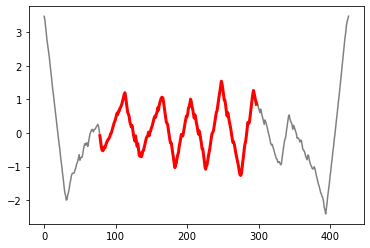

Series ID: 84, start_pos: 243, length: 13, info_gain: 0.21280036266145422, 


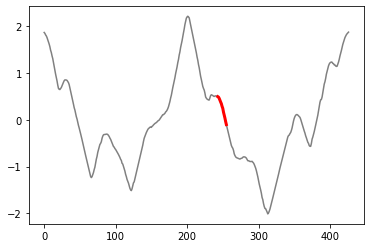

Series ID: 47, start_pos: 179, length: 235, info_gain: 0.11118705321644282, 


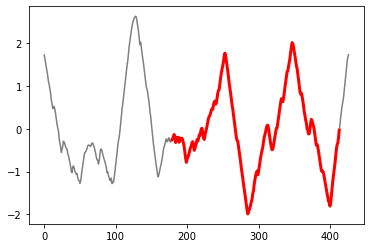

Series ID: 47, start_pos: 17, length: 134, info_gain: 0.07843642656397187, 


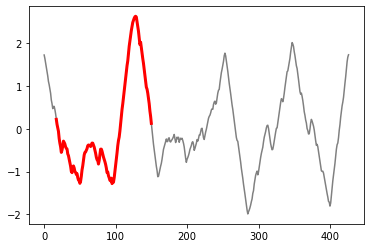

In [13]:
# for each extracted shapelet (in descending order of quality/information gain)
for s in st.shapelets[0:5]:

    # summary info about the shapelet
    print(s)

    # plot the series that the shapelet was extracted from
    plt.plot(train_x.iloc[s.series_id, 0], "gray")

    # overlay the shapelet onto the full series
    plt.plot(
        list(range(s.start_pos, (s.start_pos + s.length))),
        train_x.iloc[s.series_id, 0][s.start_pos : s.start_pos + s.length],
        "r",
        linewidth=3.0,
    )
    plt.show()

#0: Series ID: 136, start_pos: 78, length: 220, info_gain: 0.34056073206331744, 
#1: Series ID: 84, start_pos: 243, length: 13, info_gain: 0.21280036266145422, 
#2: Series ID: 47, start_pos: 179, length: 235, info_gain: 0.11118705321644282, 
#3: Series ID: 47, start_pos: 17, length: 134, info_gain: 0.07843642656397187, 


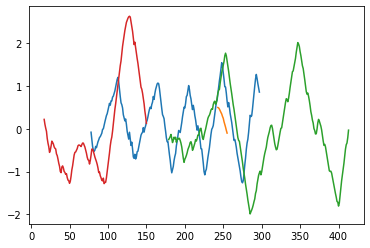

In [14]:
# for each extracted shapelet (in descending order of quality/information gain)
for i in range(0, min(len(st.shapelets), 5)):
    s = st.shapelets[i]
    # summary info about the shapelet
    print("#" + str(i) + ": " + str(s))

    # overlay shapelets
    plt.plot(
        list(range(s.start_pos, (s.start_pos + s.length))),
        train_x.iloc[s.series_id, 0][s.start_pos : s.start_pos + s.length],
    )

plt.show()

In [15]:
import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

from sktime.datasets import load_osuleaf

In [16]:
train_x, train_y = load_osuleaf(split="train", return_X_y=True)
test_x, test_y = load_osuleaf(split="test", return_X_y=True)

In [17]:
# example pipeline with 1 minute time limit
pipeline = Pipeline(
    [
        (
            "st",
            ContractedShapeletTransform(
                time_contract_in_mins=time_contract_in_mins,
                num_candidates_to_sample_per_case=10,
                verbose=False,
            ),
        ),
        (
            "rf", 
            RandomForestClassifier(n_estimators=100)
        ),
    ]
)

In [18]:
start = time.time()
pipeline.fit(train_x, train_y)
end_build = time.time()
preds = pipeline.predict(test_x)
end_test = time.time()

In [19]:
print("Results:")
print("Correct:")
correct = sum(preds == test_y)
print("\t" + str(correct) + "/" + str(len(test_y)))
print("\t" + str(correct / len(test_y)))
print("\nTiming:")
print("\tTo build:   " + str(end_build - start) + " secs")
print("\tTo predict: " + str(end_test - end_build) + " secs")

Results:
Correct:
	110/242
	0.45454545454545453

Timing:
	To build:   72.68775391578674 secs
	To predict: 13.437280178070068 secs
